In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmos_cat=os.path.abspath('../lephare_cosmos/COSMOS2020.in')
cosmos_cat

'/home/joseph/PhotoZ_PhD/lephare_cosmos/COSMOS2020.in'

In [3]:
cosmos_cat_arr = np.loadtxt(cosmos_cat)
cosmos_cat_arr

array([[ 1.00000000e+00, -6.41449459e-32,  1.10222285e-31, ...,
         0.00000000e+00,  4.83900000e+00,  3.00400000e+03],
       [ 2.00000000e+00,  4.27157946e-30,  2.40319217e-31, ...,
         0.00000000e+00,  1.16600000e+00,  1.10040000e+04],
       [ 3.00000000e+00,  2.38601703e-28,  4.86178398e-31, ...,
         0.00000000e+00,  1.64900000e-01,  1.10040000e+04],
       ...,
       [ 1.84180000e+04,  6.03762848e-29,  2.91500030e-31, ...,
         0.00000000e+00,  2.14000000e-01,  1.10040000e+04],
       [ 1.84190000e+04,  7.65085481e-29,  3.44004778e-31, ...,
         0.00000000e+00,  3.05300000e-01,  3.50000000e+00],
       [ 1.84200000e+04,  2.36320782e-29,  3.08680138e-31, ...,
         0.00000000e+00,  3.44800000e-01,  3.50000000e+00]])

In [4]:
cosmos_filt_dir = os.path.abspath('../LEPHARE/filt')
'''
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb",\
                                                                      "vista/Y.lowres",\
                                                                      "vista/J.lowres",\
                                                                      "vista/H.lowres",\
                                                                      "vista/K.lowres",\
                                                                      "cosmos/IB427.lowres",\
                                                                      "cosmos/IB464.lowres",\
                                                                      "cosmos/IB484.lowres",\
                                                                      "cosmos/IB505.lowres",\
                                                                      "cosmos/IB527.lowres",\
                                                                      "cosmos/IB574.lowres",\
                                                                      "cosmos/IB624.lowres",\
                                                                      "cosmos/IB679.lowres",\
                                                                      "cosmos/IB709.lowres",\
                                                                      "cosmos/IB738.lowres",\
                                                                      "cosmos/IB767.lowres",\
                                                                      "cosmos/IB827.lowres",\
                                                                      "cosmos/NB711.lowres",\
                                                                      "cosmos/NB816.lowres",\
                                                                      "vista/NB118.lowres",\
                                                                      "cosmos/irac_ch1.lowres",\
                                                                      "cosmos/irac_ch2.lowres",\
                                                                      "cosmos/irac_ch3.lowres",\
                                                                      "cosmos/irac_ch4.lowres"]
                   ]
'''
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb"]
                   ]
N_FILT=len(cosmos_filt_list)
N_FILT

7

In [5]:
1+2*N_FILT+1

16

In [6]:
cosmos_filt_list

['/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_cfht.lowres',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_new.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/rHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/iHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/zHSC.pb',
 '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/yHSC.pb']

In [7]:
#filt_trans_type = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
filt_trans_type = [1,1,1,1,1,1,1]
assert len(filt_trans_type)==N_FILT
print(len(filt_trans_type))

7


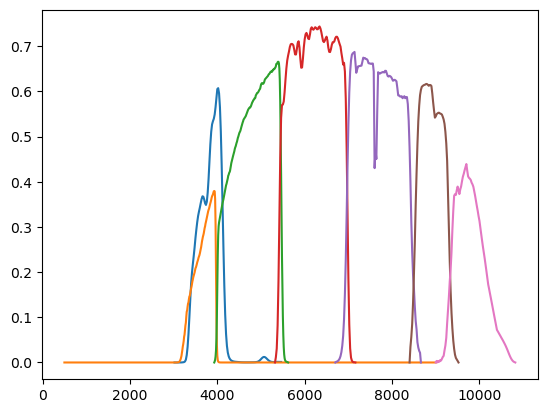

In [8]:
for filt in cosmos_filt_list: #[:7]+cosmos_filt_list[12:-5]+cosmos_filt_list[-4:]:
    x, y = np.loadtxt(filt, unpack=True)
    plt.plot(x, y)

In [9]:
filt_dict = {}
for _id, (filt, trans_typ) in enumerate(zip(cosmos_filt_list, filt_trans_type)):
    folder, file = filt.split('/')[-2:]
    name=folder+"_"+file.split('.')[0]
    if trans_typ == 1:
        transm = "photons"
    else:
        transm = "energy"
    filt_dict[_id] = {"name" : name, "path" : filt, "transmission" : transm}
filt_dict

{0: {'name': 'cosmos_u_cfht',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_cfht.lowres',
  'transmission': 'photons'},
 1: {'name': 'cosmos_u_new',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/cosmos/u_new.pb',
  'transmission': 'photons'},
 2: {'name': 'hsc_gHSC',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/gHSC.pb',
  'transmission': 'photons'},
 3: {'name': 'hsc_rHSC',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/rHSC.pb',
  'transmission': 'photons'},
 4: {'name': 'hsc_iHSC',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/iHSC.pb',
  'transmission': 'photons'},
 5: {'name': 'hsc_zHSC',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/zHSC.pb',
  'transmission': 'photons'},
 6: {'name': 'hsc_yHSC',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/filt/hsc/yHSC.pb',
  'transmission': 'photons'}}

In [10]:
len(filt_dict.keys())

7

In [11]:
_sel = [0]+[1+i for i in range(2*N_FILT)]+[62]
_sel

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 62]

In [12]:
cosmos_cat_arr[3, _sel]

array([4.00000000e+00, 1.73292941e-31, 2.10016195e-31, 6.68536022e-32,
       1.10026847e-31, 8.78764385e-33, 7.17811864e-32, 3.13135144e-31,
       8.99579025e-32, 1.38700453e-30, 1.13231057e-31, 2.20410927e-30,
       1.79501561e-31, 2.21642563e-30, 3.72873344e-31, 5.74200000e+00])

In [13]:
cosmos_inp_for_emu_all = cosmos_cat_arr[:, _sel]
_sel_z = (cosmos_inp_for_emu_all[:, -1]<=3.0)
cosmos_inp_for_emu_zfilt = cosmos_inp_for_emu_all[_sel_z, :]
_rand_sel = np.random.choice(np.arange(cosmos_inp_for_emu_zfilt.shape[0]), size=100)
cosmos_inp_for_emu = cosmos_inp_for_emu_zfilt[_rand_sel, :]
cosmos_inp_for_emu.shape

(100, 16)

(array([19., 22., 22., 10., 12.,  2.,  0.,  5.,  3.,  5.]),
 array([0.0791 , 0.37049, 0.66188, 0.95327, 1.24466, 1.53605, 1.82744,
        2.11883, 2.41022, 2.70161, 2.993  ]),
 <BarContainer object of 10 artists>)

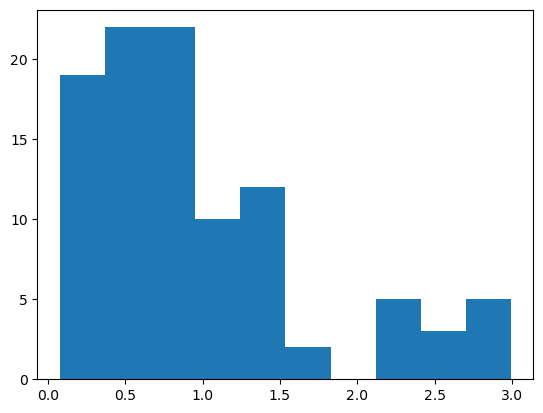

In [14]:
import matplotlib.pyplot as plt
plt.hist(cosmos_inp_for_emu[:,-1])

In [15]:
if False:
    np.savetxt("COSMOS2020_emu_hscOnly.inp", cosmos_inp_for_emu)

In [16]:
gal_test = cosmos_inp_for_emu[3, :-1]
gal_test = [gal_test[2*k] for k in range(len(gal_test)//2)]
gal_test

[11866.0,
 8.456284779130406e-32,
 1.4712965721092535e-31,
 1.0477404492805705e-31,
 1.3364981680219287e-31,
 1.3883161924454417e-31,
 1.9357537857759279e-31]

In [17]:
mags_test = -2.5*np.log10(gal_test[1:]) - 48.6

In [18]:
mags_test

array([29.082051  , 28.48074944, 28.84936572, 28.58507908, 28.54377903,
       28.18287471])

In [19]:
missing_filts = np.where(np.isnan(mags_test))[0]
missing_filts

array([], dtype=int64)

In [20]:
check = np.where(np.array(gal_test)<=0.)[0]
check

array([], dtype=int64)

In [21]:
sed_file=os.path.abspath("../lephare_cosmos/SED_FORS2_KinCalClus_SL_v5.list")
sed_list = []
with open(sed_file, 'r') as seds:
    for sed in seds:
        if sed[0] == "#":
            pass
        else:
            sed_list.append(os.path.abspath(os.path.join('../LEPHARE/sed/GAL', sed[:-1])))
sed_list = [_sed for _sed in sed_list if 'AVG' in _sed or 'EXT' in _sed]
sed_list

['/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/EXT1_CLUST_CWW_Sbc_ext_id496.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/EXT2_CLUST_CWW_Sbc_ext_id589.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/EXT1_CLUST_CWW_E_ext_id304.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/EXT2_CLUST_CWW_E_ext_id379.sed',
 '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL

In [22]:
sed_dict = {}
for _id, sed in enumerate(sed_list):
    file = sed.split('/')[-1]
    attrs = file.split("_")
    if attrs[0] == "AVG":
        name="_".join(attrs[:4])
    else:
        name="_".join(attrs[2:4])+"-"+(attrs[-1]).split('.')[0]
    sed_dict[_id] = {'name' : name, 'path' : sed}
sed_dict

{0: {'name': 'AVG_CLUST_CWW_Sbc',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed'},
 1: {'name': 'AVG_CLUST_CWW_E',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed'},
 2: {'name': 'AVG_CLUST_CWW_Im',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed'},
 3: {'name': 'AVG_CLUST_CWW_Scd',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed'},
 4: {'name': 'AVG_CLUST_KIN_Sb',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed'},
 5: {'name': 'AVG_CLUST_KIN_Sa',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sa_ext.sed'},
 6: {'name': 'CWW_Sbc-id496',
  'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/EXT1_CLUST_CWW_Sbc_ext_id496.sed'},
 7: {'name': 'CWW_Sbc-id589',
  'path': '

In [23]:
cosmo_dict = {"h0": 70.0, "om0": 0.3, "l0": 0.7}
z_grid_dict = {"z_min": 0.01, "z_max": 3., "z_step": 0.1}
wl_grid_dict = {"lambda_min": 100., "lambda_max": 11000., "lambda_step": 1.}
extinc_dict = {0 : {"name" : "Calzetti", "path" : os.path.abspath('../LEPHARE/ext/SB_calzetti.dat')},\
               1 : {"name" : "Prevot", "path" : os.path.abspath('../LEPHARE/ext/SMC_prevot.dat')},\
              }
ebv_list = [0., 0.1, 0.2, 0.4] #[0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
estimator = "chi2"
data_inp_dict = {"path": os.path.abspath("COSMOS2020_emu_hscOnly.inp"), "type": "F"}
data_inp_dict

{'path': '/home/joseph/PhotoZ_PhD/EmuLP/COSMOS2020_emu_hscOnly.inp',
 'type': 'F'}

In [24]:
run_opt_dict = {"Cosmology" : cosmo_dict,\
                "Z_GRID" : z_grid_dict,\
                "WL_GRID" : wl_grid_dict,\
                "Templates" : sed_dict,\
                "Filters" : filt_dict,\
                "Dataset" : data_inp_dict,\
                "Extinctions" : extinc_dict,\
                "e_BV": ebv_list,\
                "Estimator" : estimator,\
                "save results" : True,\
                "run name" : "COSMOS2020-with-FORS2-HSC_only-jaxcosmo"
               }
run_opt_dict

{'Cosmology': {'h0': 70.0, 'om0': 0.3, 'l0': 0.7},
 'Z_GRID': {'z_min': 0.01, 'z_max': 3.0, 'z_step': 0.1},
 'WL_GRID': {'lambda_min': 100.0, 'lambda_max': 11000.0, 'lambda_step': 1.0},
 'Templates': {0: {'name': 'AVG_CLUST_CWW_Sbc',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Sbc_ext.sed'},
  1: {'name': 'AVG_CLUST_CWW_E',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_E_ext.sed'},
  2: {'name': 'AVG_CLUST_CWW_Im',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Im_ext.sed'},
  3: {'name': 'AVG_CLUST_CWW_Scd',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_CWW_Scd_ext.sed'},
  4: {'name': 'AVG_CLUST_KIN_Sb',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5/AVG_CLUST_KIN_Sb_ext.sed'},
  5: {'name': 'AVG_CLUST_KIN_Sa',
   'path': '/home/joseph/PhotoZ_PhD/LEPHARE/sed/GAL/FORS2_KinCalClus_batch5

In [25]:
import json

In [26]:
if True:
    with open("COSMOS2020-with-FORS2-HSC_only-jaxcosmo.json", "w") as wf:
        json.dump(run_opt_dict, wf)